In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics 
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('/Users/mukuljindal/Local/Flight/Flightdelays.csv')
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [6]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [7]:
data['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [8]:
data = data.drop('Unnamed: 25',axis=1)

In [9]:
data.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [10]:
data = data[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]] 
data.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [11]:
data=data.fillna({'ARR_DEL15': 1})
data=data.fillna({'DEP_DEL15': 0})
data.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [12]:
import math
for index, row in data.iterrows():
    data.loc[index,'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME']/100)
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [13]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['DEST'] = le.fit_transform(data ['DEST'])
data['ORIGIN'] = le.fit_transform(data ['ORIGIN'])

In [14]:
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [15]:
data['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [16]:
x=data.iloc[:,0:8].values
y=data.iloc[:,8:9].values

In [17]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7
0,1399.0,1.0,1.0,5.0,0.0,4.0,21.0,0.0
1,1476.0,1.0,1.0,5.0,1.0,3.0,14.0,0.0
2,1597.0,1.0,1.0,5.0,0.0,4.0,12.0,0.0
3,1768.0,1.0,1.0,5.0,4.0,3.0,13.0,0.0
4,1823.0,1.0,1.0,5.0,4.0,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...
11226,1715.0,12.0,30.0,5.0,1.0,0.0,12.0,0.0
11227,1770.0,12.0,30.0,5.0,4.0,3.0,20.0,1.0
11228,1823.0,12.0,30.0,5.0,1.0,4.0,22.0,0.0
11229,1901.0,12.0,30.0,5.0,0.0,4.0,18.0,0.0


In [18]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()

In [19]:
pd.DataFrame(z)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
11226,0.0,1.0,0.0,0.0,0.0
11227,0.0,0.0,0.0,0.0,1.0
11228,0.0,1.0,0.0,0.0,0.0
11229,1.0,0.0,0.0,0.0,0.0


In [20]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [21]:
data = pd.get_dummies(data, columns=['ORIGIN','DEST'])
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,True,False,False,False,False,False,False,False,False,True
1,1476,1,1,5,14,0.0,0.0,False,True,False,False,False,False,False,False,True,False
2,1597,1,1,5,12,0.0,0.0,True,False,False,False,False,False,False,False,False,True
3,1768,1,1,5,13,0.0,0.0,False,False,False,False,True,False,False,False,True,False
4,1823,1,1,5,6,0.0,0.0,False,False,False,False,True,False,True,False,False,False


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.8593680462839342

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.910547396528705

In [25]:
pd.DataFrame(rf.predict(x_test)).value_counts()

0  
0.0    2003
1.0     244
Name: count, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='sag')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8615932354250111

In [27]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7725856697819314

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8491321762349799

Testing Sensitivity for Random Forest 0.9331003494757864
Testing Specificity for Random Forest 0.7254098360655737
Testing Precision for Random Forest 0.9653925619834711
Testing accuracy for Random Forest 0.910547396528705


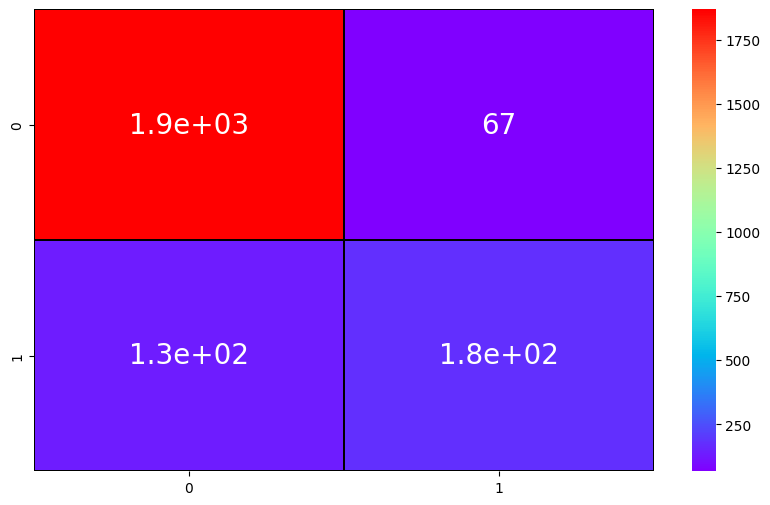

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='rainbow',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

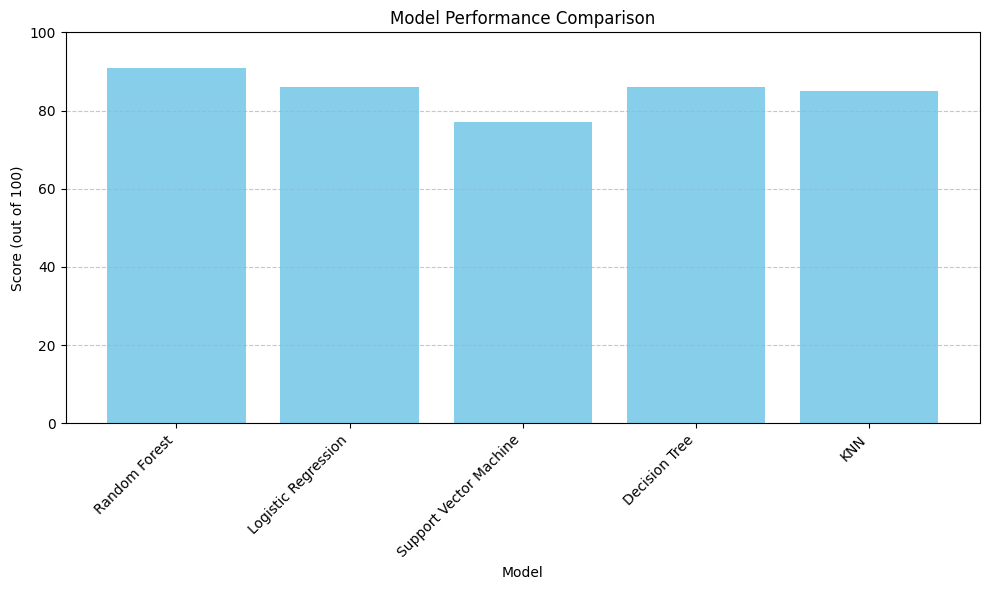

In [41]:
models = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'KNN']

scores = [91,86,77,86,85]

max_score = 100

normalized_scores = [score / max_score * 100 for score in scores]

plt.figure(figsize=(10, 6))
plt.bar(models, normalized_scores, color='skyblue')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score (out of 100)')
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


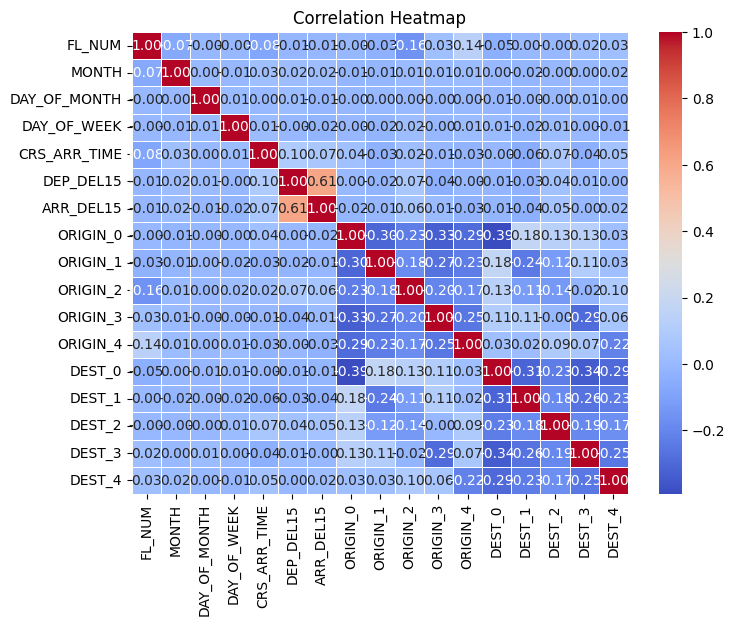

In [46]:
# Plot correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/var/folders/p4/8w_qbhxn351bwgfhlcdlwrf40000gn/T/ipykernel_1697/917008352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='ARR_DEL15', y='CRS_ARR_TIME', palette='Set2')


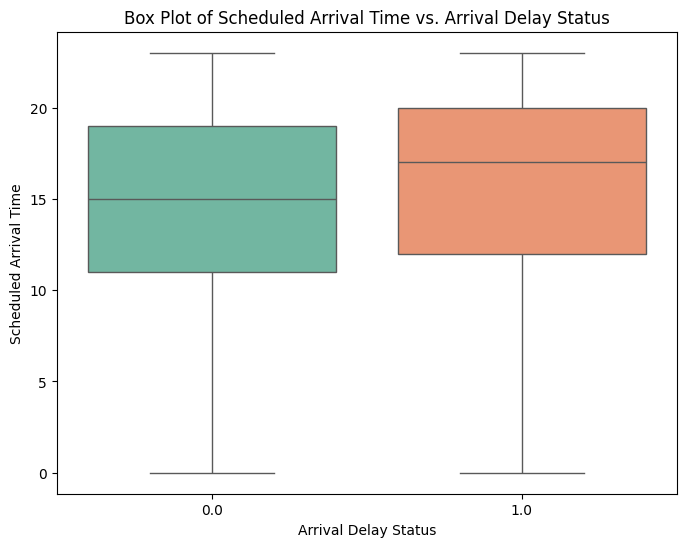

In [48]:
# Plot box plots for numerical variables vs. target
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='ARR_DEL15', y='CRS_ARR_TIME', palette='Set2')
plt.title('Box Plot of Scheduled Arrival Time vs. Arrival Delay Status')
plt.xlabel('Arrival Delay Status')
plt.ylabel('Scheduled Arrival Time')
plt.show()


/var/folders/p4/8w_qbhxn351bwgfhlcdlwrf40000gn/T/ipykernel_1697/3300660494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, palette='viridis')


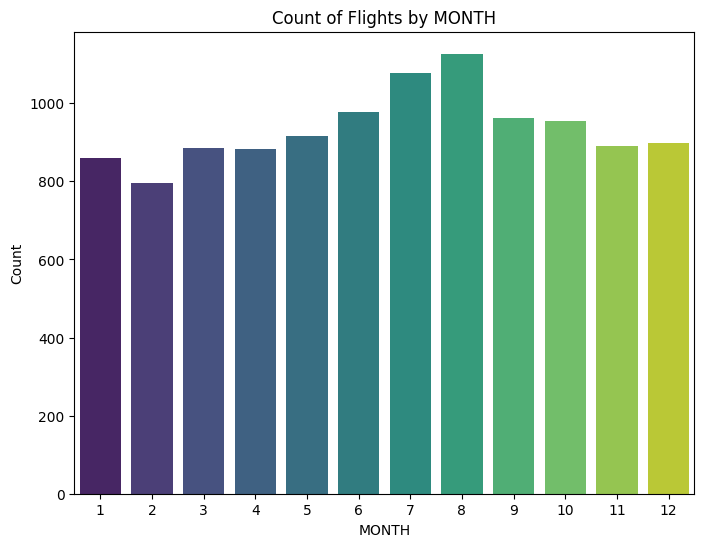

/var/folders/p4/8w_qbhxn351bwgfhlcdlwrf40000gn/T/ipykernel_1697/3300660494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, palette='viridis')


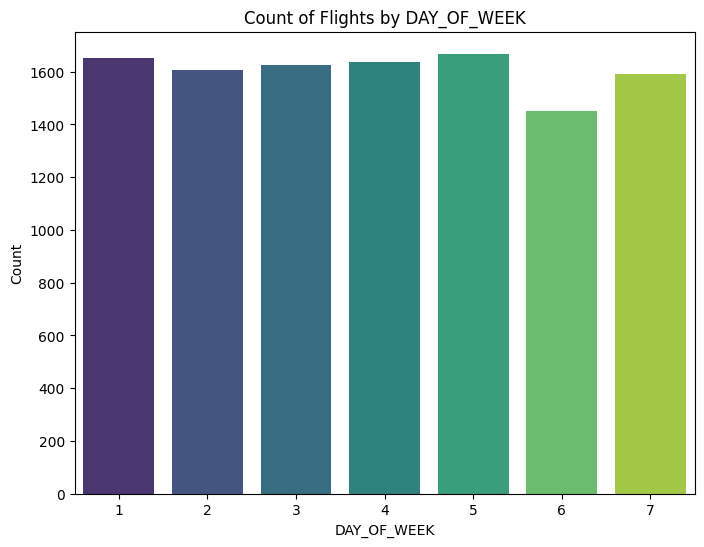

In [49]:
categorical_variables = ['MONTH', 'DAY_OF_WEEK']
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=var, palette='viridis')
    plt.title(f'Count of Flights by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

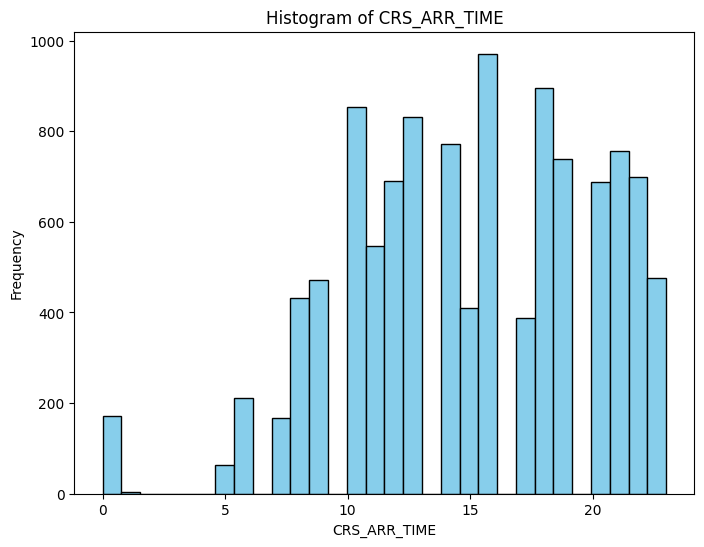

In [52]:
numerical_variables = ['CRS_ARR_TIME']
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


/var/folders/p4/8w_qbhxn351bwgfhlcdlwrf40000gn/T/ipykernel_1697/30706831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='ARR_DEL15', y='CRS_ARR_TIME', palette='Set2')


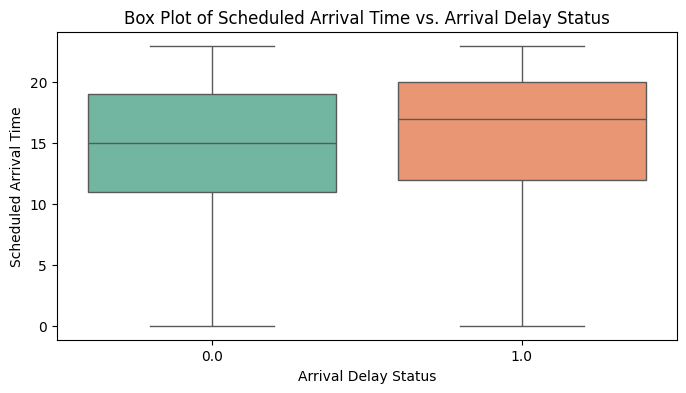

In [54]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='ARR_DEL15', y='CRS_ARR_TIME', palette='Set2')
plt.title('Box Plot of Scheduled Arrival Time vs. Arrival Delay Status')
plt.xlabel('Arrival Delay Status')
plt.ylabel('Scheduled Arrival Time')
plt.show()